In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import sys
sys.path.append('../utils')
sys.path.append('../dFC')
import widefield_utils
import connectivity_measures

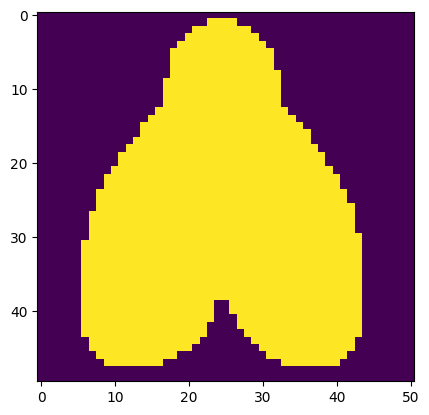

In [2]:
mask = np.load(r"/home/k21208334/calcium_analyses/data/dowsampled_tight_mask.npy")
plt.imshow(mask)
good_indices = np.ravel(mask)

In [6]:
h=300
w=304
H=50 # this is the size of downsampling. We have to find a better way to do this
W=51
start = 0
end = 25000

names = ["NXAK22.1A","NXAK14.1A","NXAK7.1B","NXAK4.1B","NRXN78.1D","NRXN78.1A"]
names_knock = ["NXAK24.1C","NXAK20.1B","NXAK16.1B","NXAK10.1A","NXAK4.1A","NRXN71.2A"]

In [7]:
# first show mean and std of centrality for every area for each individual. Then we'll do "general" statistics

/home/k21208334/calcium_analyses/calcium_dynamics/analyze/../dFC/connectivity_measures.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


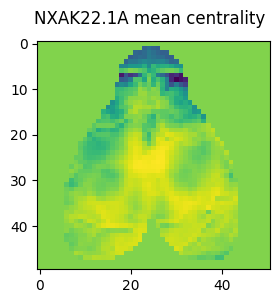

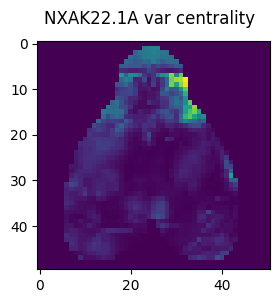

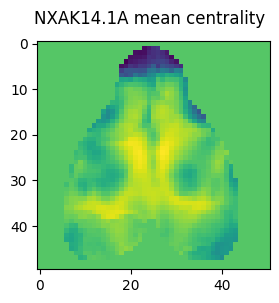

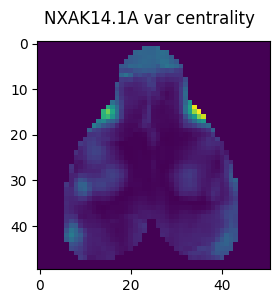

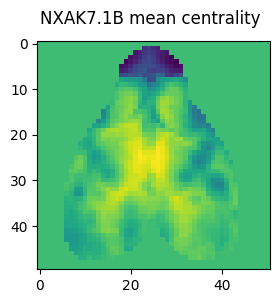

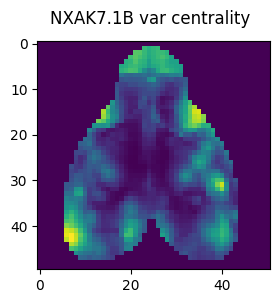

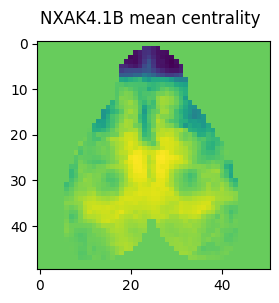

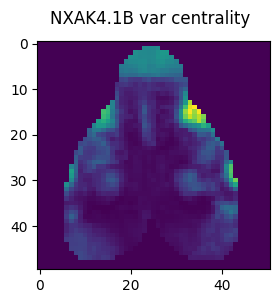

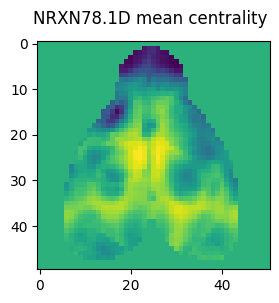

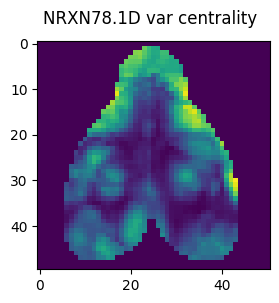

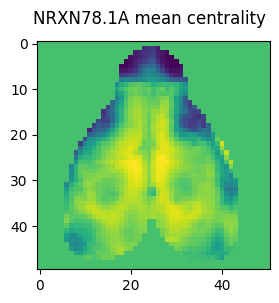

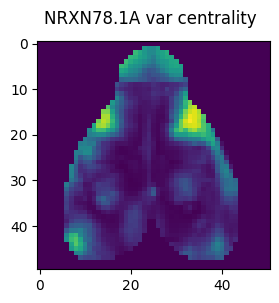

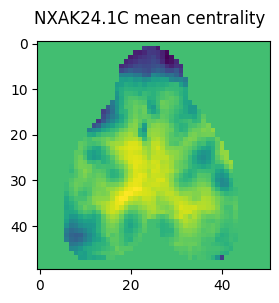

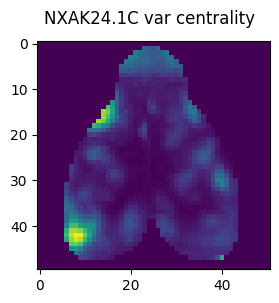

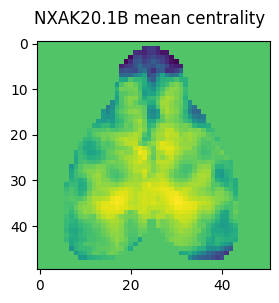

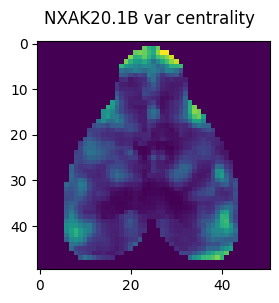

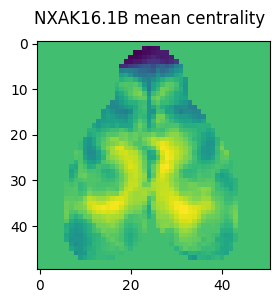

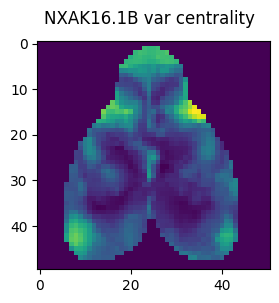

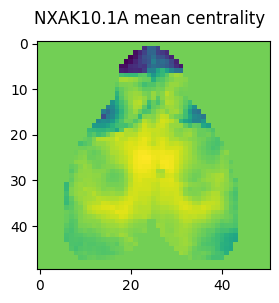

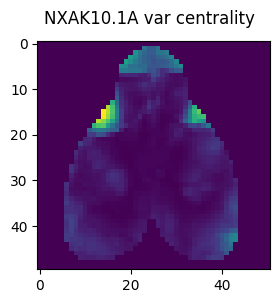

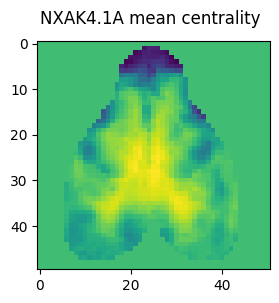

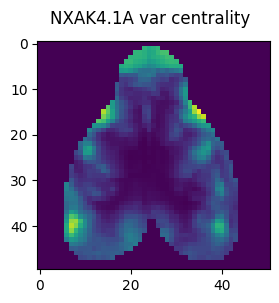

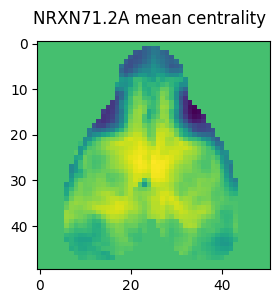

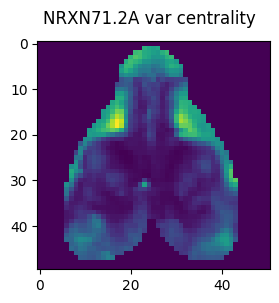

In [13]:
for name in names+names_knock:
    data = '/home/k21208334/calcium_analyses/data/centrality_measures/' + name + ".npy"
    centr_dynamics = np.load(data)
    mean_centrality = np.mean(centr_dynamics,axis=0)
    var_centrality = np.var(centr_dynamics,axis=0)
    fig = connectivity_measures.show_array(mean_centrality,H,W,good_indices,mean_centrality.min(),mean_centrality.max())
    fig.set_size_inches(3,3)
    fig.suptitle(name+' mean centrality')
    fig2 = connectivity_measures.show_array(var_centrality,H,W,good_indices,var_centrality.min(),var_centrality.max())
    fig2.set_size_inches(3,3)
    fig2.suptitle(name+' var centrality')


In [ ]:
# now i analyze the two groups separately to see what happens

In [15]:
size = np.sum(mask)
centralities_wild = np.empty((0,size))
centralities_knock = np.empty((0,size))

# load clustered data 

for name in names:

    data = '/home/k21208334/calcium_analyses/data/centrality_measures/' + name + ".npy"
    centr = np.load(data)
    centralities_wild=np.vstack((centralities_wild,centr))

for name in names_knock:

    data = '/home/k21208334/calcium_analyses/data/centrality_measures/' + name + ".npy"
    centr = np.load(data)
    centralities_knock=np.vstack((centralities_knock,centr))

In [14]:
np.sum(mask)

1258

Text(0.5, 0.98, 'NRXN71.2A var centrality wild')

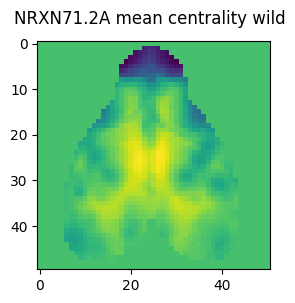

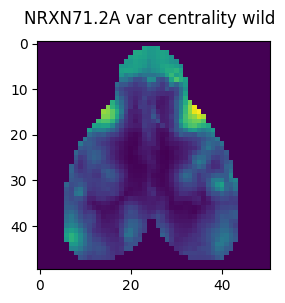

In [16]:
# plot mean and variance of overall centrality in wildtype

mean_centrality_wild = np.mean(centralities_wild,axis=0)
var_centrality_wild = np.var(centralities_wild,axis=0)   
fig = connectivity_measures.show_array(mean_centrality_wild,H,W,good_indices,mean_centrality_wild.min(),mean_centrality_wild.max())
fig.set_size_inches(3,3)
fig.suptitle(name+' mean centrality wild')
fig2 = connectivity_measures.show_array(var_centrality_wild,H,W,good_indices,var_centrality_wild.min(),var_centrality_wild.max())
fig2.set_size_inches(3,3)
fig2.suptitle(name+' var centrality wild')

Text(0.5, 0.98, 'NRXN71.2A var centrality wild')

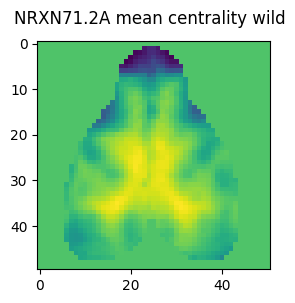

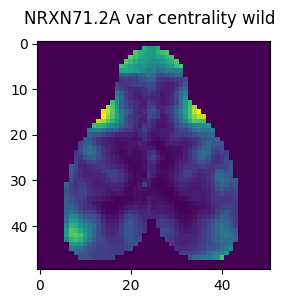

In [17]:
# plot mean and variance of overall centrality in knockout

mean_centrality_knock = np.mean(centralities_knock,axis=0)
var_centrality_knock = np.var(centralities_knock,axis=0)   
fig = connectivity_measures.show_array(mean_centrality_knock,H,W,good_indices,mean_centrality_knock.min(),mean_centrality_knock.max())
fig.set_size_inches(3,3)
fig.suptitle(name+' mean centrality wild')
fig2 = connectivity_measures.show_array(var_centrality_knock,H,W,good_indices,var_centrality_knock.min(),var_centrality_knock.max())
fig2.set_size_inches(3,3)
fig2.suptitle(name+' var centrality wild')

In [18]:
#now I can do a t-test. How do I correct for MULTIPLE COMPARISON? 

stat = scipy.stats.mannwhitneyu(centralities_wild,centralities_knock,axis=0)

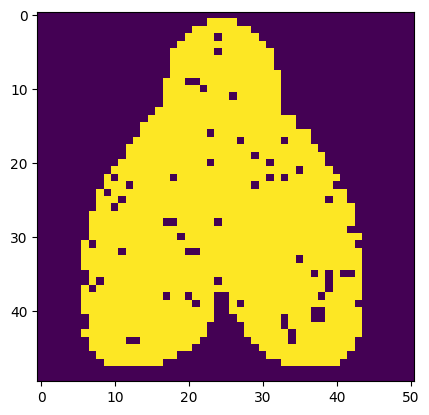

In [30]:
results = stat.pvalue < 0.05/1258 #bonferroni --- but it's strange we have still all this significance...prolly because we have lots of signals
fig = connectivity_measures.show_array(results,H,W,good_indices,0,1)
